<a href="https://colab.research.google.com/github/buthaina279/LSTM_MIMIC-III/blob/main/Information_gain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#for google drive
DATA_FILEPATH = "/content/drive/MyDrive/final_project/"

In [ ]:
from __future__ import division
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn import preprocessing

In [ ]:
train = pd.read_csv(DATA_FILEPATH + 'train.csv',index_col=0) 
validation = pd.read_csv(DATA_FILEPATH + 'validation.csv',index_col=0) 
test = pd.read_csv(DATA_FILEPATH + 'test.csv',index_col=0) 

In [ ]:
train.head()

In [ ]:
validation.head()

,subject_id,hadm_id,icustay_id,age,fullcode_first,dnr_first,fullcode,dnr,cmo_first,cmo_last,...,insurance_Private,insurance_Self Pay,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT,first_careunit_CCU,first_careunit_CSRU,first_careunit_MICU,first_careunit_SICU,first_careunit_TSICU
0,54135,150600,228783,71,0.0,1.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
1,54135,150600,228783,71,0.0,1.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
2,54135,150600,228783,71,0.0,1.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
3,54135,150600,228783,71,0.0,1.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
4,54135,150600,228783,71,0.0,1.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
test.head()

,subject_id,hadm_id,icustay_id,age,fullcode_first,dnr_first,fullcode,dnr,cmo_first,cmo_last,...,insurance_Private,insurance_Self Pay,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT,first_careunit_CCU,first_careunit_CSRU,first_careunit_MICU,first_careunit_SICU,first_careunit_TSICU
0,11431,133663,262203,62,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,0,0,0
1,11431,133663,262203,62,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,0,0,0
2,11431,133663,262203,62,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,0,0,0
3,11431,133663,262203,62,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,0,0,0
4,11431,133663,262203,62,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,0,0,0


##Drop IDs

In [ ]:
df_no_ids = train.drop(['subject_id','hadm_id','icustay_id', 'hours_in'], axis=1)

In [ ]:
print("The sape after dropping the IDs is ",df_no_ids.shape)

The sape after dropping the IDs is  (465471, 76)


In [ ]:
df_no_ids.head()

,age,fullcode_first,dnr_first,fullcode,dnr,cmo_first,cmo_last,cmo,los_icu,mort_icu,...,insurance_Private,insurance_Self Pay,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT,first_careunit_CCU,first_careunit_CSRU,first_careunit_MICU,first_careunit_SICU,first_careunit_TSICU
0,74,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.777801,0,...,0,0,0,1,0,0,0,0,1,0
1,74,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.777801,0,...,0,0,0,1,0,0,0,0,1,0
2,74,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.777801,0,...,0,0,0,1,0,0,0,0,1,0
3,74,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.777801,0,...,0,0,0,1,0,0,0,0,1,0
4,74,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.777801,0,...,0,0,0,1,0,0,0,0,1,0


##Take the target

In [ ]:
target = df_no_ids['mort_icu']
df_no_ids_target = df_no_ids.drop(['mort_icu'], axis=1)
print("The shape after dropping the target is ",df_no_ids_target.shape ) 

The shape after dropping the target is  (465471, 75)


##Scaling the data

In [ ]:
scaler_MinMaxScaler = preprocessing.MinMaxScaler()
#scaler_StandardScaler = preprocessing.StandardScaler()

In [ ]:
# Fit data on MinMaxScaler scaler

fitted_MinMaxdScaler = scaler_MinMaxScaler.fit(df_no_ids_target)
#df_MinMaxScaler_StandardScaler = fitted_StandardScaler.transform(df_no_ids_target)
df_StandardScaler = fitted_MinMaxdScaler.transform(df_no_ids_target)

##Feature selection

In [ ]:
%%time
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information

mutual_info = mutual_info_classif(df_StandardScaler, target)
mutual_info

CPU times: user 6min 9s, sys: 1.3 s, total: 6min 10s
Wall time: 6min 12s


In [ ]:
#mutual_info = pd.Series(mutual_info,df.columns[0:len(df.columns)-1])
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_no_ids_target.columns
mutual_info.sort_values(ascending=False)

los_icu                        0.248472
fullcode_first                 0.095818
fullcode                       0.095300
admission_type_EMERGENCY       0.067244
ethnicity_WHITE                0.052784
                                 ...   
ethnicity_WHITE - BRAZILIAN    0.000000
ethnicity_ASIAN - KOREAN       0.000000
ethnicity_OTHER                0.000000
ethnicity_BLACK/AFRICAN        0.000000
ethnicity_SOUTH AMERICAN       0.000000
Length: 75, dtype: float64

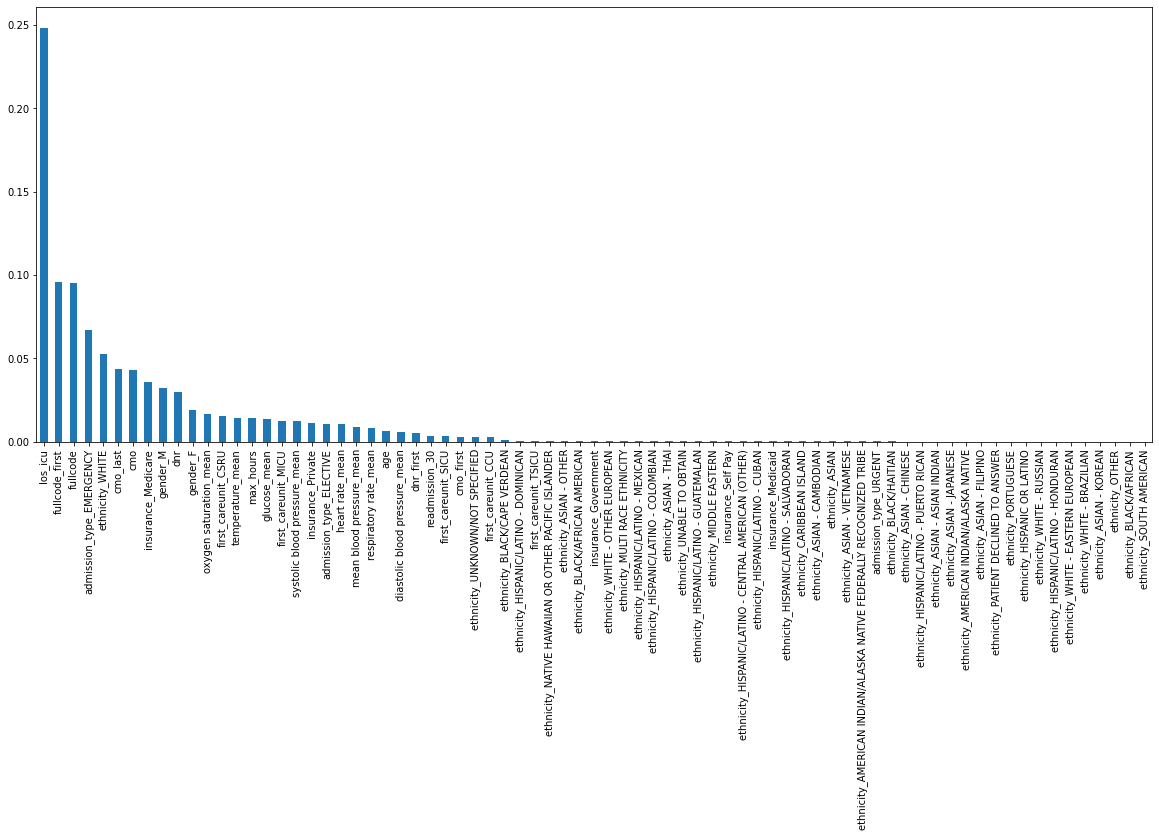

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8), orientation='vertical')

In [ ]:
%%time
from sklearn.feature_selection import SelectKBest

#we Will select the top 45 important features (half of 90 features)
sel_ThirtySix_cols = SelectKBest(mutual_info_classif, k=36)
sel_ThirtySix_cols_fit = sel_ThirtySix_cols.fit(df_StandardScaler, target)
df_no_ids_target.columns[sel_ThirtySix_cols_fit.get_support()]

CPU times: user 6min 7s, sys: 833 ms, total: 6min 8s
Wall time: 6min 6s


##Plot the top 36 features

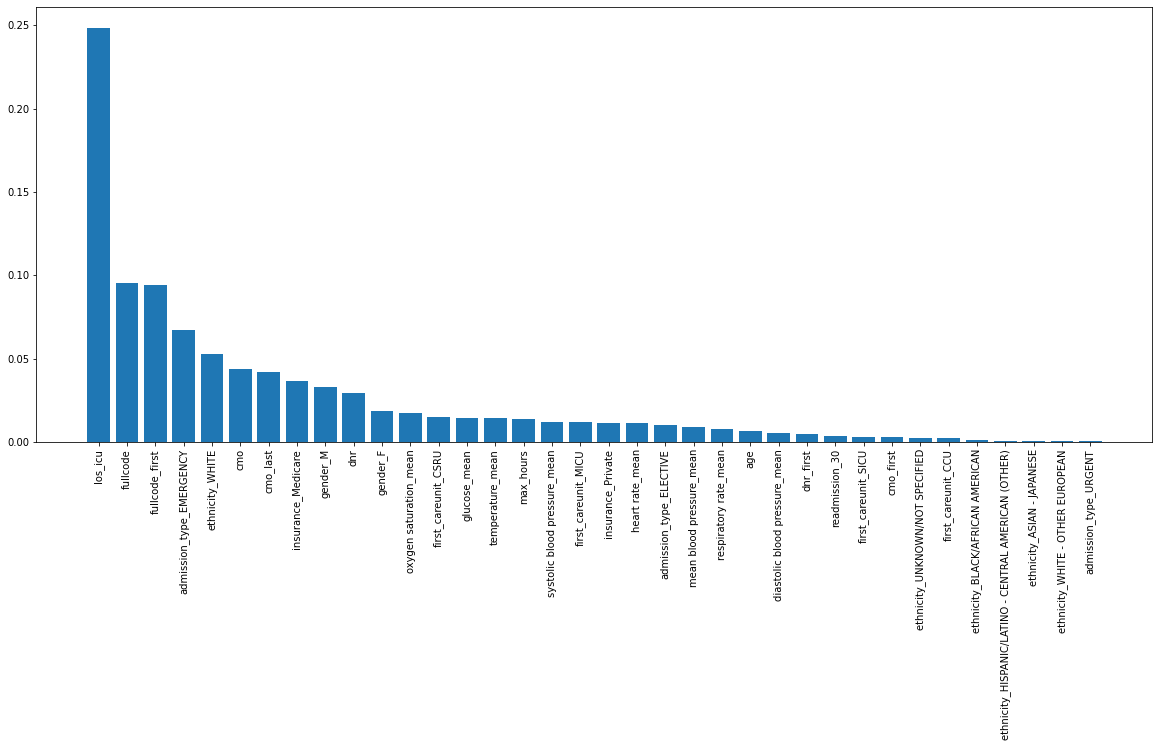

In [ ]:
# Get the indices sorted by most important to least important
indices = np.argsort(sel_ThirtySix_cols_fit.scores_)[::-1]

# To get your top 36 feature names
features = []
for i in range(36):
    features.append(df_no_ids_target.columns[indices[i]])

# Now plot
#plt.figure()
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.bar(features, sel_ThirtySix_cols_fit.scores_[indices[range(36)]], orientation='vertical')
plt.show()

In [ ]:
features

['los_icu',
 'fullcode',
 'fullcode_first',
 'admission_type_EMERGENCY',
 'ethnicity_WHITE',
 'cmo',
 'cmo_last',
 'insurance_Medicare',
 'gender_M',
 'dnr',
 'gender_F',
 'oxygen saturation_mean',
 'first_careunit_CSRU',
 'glucose_mean',
 'temperature_mean',
 'max_hours',
 'systolic blood pressure_mean',
 'first_careunit_MICU',
 'insurance_Private',
 'heart rate_mean',
 'admission_type_ELECTIVE',
 'mean blood pressure_mean',
 'respiratory rate_mean',
 'age',
 'diastolic blood pressure_mean',
 'dnr_first',
 'readmission_30',
 'first_careunit_SICU',
 'cmo_first',
 'ethnicity_UNKNOWN/NOT SPECIFIED',
 'first_careunit_CCU',
 'ethnicity_BLACK/AFRICAN AMERICAN',
 'ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
 'ethnicity_ASIAN - JAPANESE',
 'ethnicity_WHITE - OTHER EUROPEAN',
 'admission_type_URGENT']

##Take the best 36 features in addition to the IDs and target

Because I need them in the next steps

In [ ]:
list_36 = ['subject_id',
            'hadm_id',
            'icustay_id',
           'hours_in',
            'los_icu',
                      'fullcode',
                      'fullcode_first',
                      'admission_type_EMERGENCY',
                      'ethnicity_WHITE',
                      'cmo',
                      'cmo_last',
                      'insurance_Medicare',
                      'gender_M',
                      'dnr',
                      'gender_F',
                      'oxygen saturation_mean',
                      'first_careunit_CSRU',
                      'glucose_mean',
                      'temperature_mean',
                      'max_hours',
                      'systolic blood pressure_mean',
                      'first_careunit_MICU',
                      'insurance_Private',
                      'heart rate_mean',
                      'admission_type_ELECTIVE',
                      'mean blood pressure_mean',
                      'respiratory rate_mean',
                      'age',
                      'diastolic blood pressure_mean',
                      'dnr_first',
                      'readmission_30',
                      'first_careunit_SICU',
                      'cmo_first',
                      'ethnicity_UNKNOWN/NOT SPECIFIED',
                      'first_careunit_CCU',
                      'ethnicity_BLACK/AFRICAN AMERICAN',
                      'ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
                      'ethnicity_ASIAN - JAPANESE',
                      'ethnicity_WHITE - OTHER EUROPEAN',
                      'admission_type_URGENT',
                        'mort_icu']
            

In [ ]:
train_36 = train[list_36]
train_36.head()

,subject_id,hadm_id,icustay_id,hours_in,los_icu,fullcode,fullcode_first,admission_type_EMERGENCY,ethnicity_WHITE,cmo,...,first_careunit_SICU,cmo_first,ethnicity_UNKNOWN/NOT SPECIFIED,first_careunit_CCU,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ethnicity_ASIAN - JAPANESE,ethnicity_WHITE - OTHER EUROPEAN,admission_type_URGENT,mort_icu
0,90863,152704,290512,0,1.777801,1.0,1.0,1,0,0.0,...,1,0.0,1,0,0,0,0,0,0,0
1,90863,152704,290512,1,1.777801,1.0,1.0,1,0,0.0,...,1,0.0,1,0,0,0,0,0,0,0
2,90863,152704,290512,2,1.777801,1.0,1.0,1,0,0.0,...,1,0.0,1,0,0,0,0,0,0,0
3,90863,152704,290512,3,1.777801,1.0,1.0,1,0,0.0,...,1,0.0,1,0,0,0,0,0,0,0
4,90863,152704,290512,4,1.777801,1.0,1.0,1,0,0.0,...,1,0.0,1,0,0,0,0,0,0,0


In [ ]:
validation_36 = validation[list_36]
validation_36.head()

,subject_id,hadm_id,icustay_id,hours_in,los_icu,fullcode,fullcode_first,admission_type_EMERGENCY,ethnicity_WHITE,cmo,...,first_careunit_SICU,cmo_first,ethnicity_UNKNOWN/NOT SPECIFIED,first_careunit_CCU,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ethnicity_ASIAN - JAPANESE,ethnicity_WHITE - OTHER EUROPEAN,admission_type_URGENT,mort_icu
0,54135,150600,228783,0,1.134317,0.0,0.0,1,1,0.0,...,0,0.0,0,0,0,0,0,0,0,0
1,54135,150600,228783,1,1.134317,0.0,0.0,1,1,0.0,...,0,0.0,0,0,0,0,0,0,0,0
2,54135,150600,228783,2,1.134317,0.0,0.0,1,1,0.0,...,0,0.0,0,0,0,0,0,0,0,0
3,54135,150600,228783,3,1.134317,0.0,0.0,1,1,0.0,...,0,0.0,0,0,0,0,0,0,0,0
4,54135,150600,228783,4,1.134317,0.0,0.0,1,1,0.0,...,0,0.0,0,0,0,0,0,0,0,0


In [ ]:
test_36 = test[list_36]
test_36.head()

,subject_id,hadm_id,icustay_id,hours_in,los_icu,fullcode,fullcode_first,admission_type_EMERGENCY,ethnicity_WHITE,cmo,...,first_careunit_SICU,cmo_first,ethnicity_UNKNOWN/NOT SPECIFIED,first_careunit_CCU,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ethnicity_ASIAN - JAPANESE,ethnicity_WHITE - OTHER EUROPEAN,admission_type_URGENT,mort_icu
0,11431,133663,262203,0,6.435521,1.0,1.0,1,1,0.0,...,0,0.0,0,1,0,0,0,0,0,0
1,11431,133663,262203,1,6.435521,1.0,1.0,1,1,0.0,...,0,0.0,0,1,0,0,0,0,0,0
2,11431,133663,262203,2,6.435521,1.0,1.0,1,1,0.0,...,0,0.0,0,1,0,0,0,0,0,0
3,11431,133663,262203,3,6.435521,1.0,1.0,1,1,0.0,...,0,0.0,0,1,0,0,0,0,0,0
4,11431,133663,262203,4,6.435521,1.0,1.0,1,1,0.0,...,0,0.0,0,1,0,0,0,0,0,0


##Check duplicates

In [ ]:
# Shows the duplicated data
train_36.duplicated().sum()

0

In [ ]:
# Shows the duplicated data
validation_36.duplicated().sum()

0

In [ ]:
# Shows the duplicated data
test_36.duplicated().sum()

0

save the most relevant features

In [ ]:
train_36.to_csv(DATA_FILEPATH +'train_36.csv')
validation_36.to_csv(DATA_FILEPATH +'validation_36.csv')
test_36.to_csv(DATA_FILEPATH +'test_36.csv')